<h1 style="color: #0000FF">CAPSTONE PROJECT : REMITTANCE PATTERNS AND ECONOMIC DEVELOPMENT</h1>


Team Catboost
© 2023 Hamoye Data Science Internship

---



- **This Research Paper for this project is  on  [Google Docs](https://docs.google.com/document/d/1o1uPasG734R5bv-ptWaFKo88HH2RhZpoElGTm3Cndvc/edit).**
- **The dcoumentation on this project is hosted on [Google Docs](https://docs.google.com/document/d/1wf9p4NuqtEVIMXHbjOJKFH2DEnwu3b3A/edit?rtpof=true&sd=true).**
- **The Exploratory Data Analysis of this project is on [GitHub](https://github.com/MiracleUche123/CatBoost-Team-Project/blob/main/Exploratory%20Data%20Analysis.ipynb).**
- **The Hypothesis Testing of this project is on [GitHub](https://app.powerbi.com/view?r=eyJrIjoiYzMwYmRmY2QtZjJhZi00ZDRlLTk4MmYtMDk5MGViMTAzZGNlIiwidCI6IjU0NjJmMDc4LWFiYTgtNDE1OS05MWYwLWVhODg1MmJjOTU4NCJ9).**
- **The supporting visualization of this project is on [Power BI](https://app.powerbi.com/view?r=eyJrIjoiYzMwYmRmY2QtZjJhZi00ZDRlLTk4MmYtMDk5MGViMTAzZGNlIiwidCI6IjU0NjJmMDc4LWFiYTgtNDE1OS05MWYwLWVhODg1MmJjOTU4NCJ9).**
- **The presentation is hosted on [Power Point](https://docs.google.com/presentation/d/14djmqNU36mC2RXSl-C-B7rOsaddkawvN/edit?usp=sharing&ouid=101028808435953258774&rtpof=true&sd=true).**
- **This code is hosted on [GitHub](https://github.com/MiracleUche123/CatBoost-Team-Project).**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv(r"C:\Users\chine\Downloads\Catboost Project\Cleaned Data\Cleaned Data\final_remittance_data.csv")
df.head()

,Year,country_code,country_name,new_income_group,new_region,population,remittance_growth_rate,remittance_paid,remittance_per_capita,remittance_received,remittance_volatility,unemployment_rate,unemployment_rate_change,net_migration,gdp,remittance_to_gdp_ratio
0,1970,AFG,Afghanistan,Low income,South Asia,10752971,0.0,0.0,0.0,0.0,293485541.0,0.0,0.0,4458,1.748887e+09,0.0
1,1971,AFG,Afghanistan,Low income,South Asia,11015857,0.0,0.0,0.0,0.0,293485541.0,0.0,0.0,-12801,1.831109e+09,0.0
2,1972,AFG,Afghanistan,Low income,South Asia,11286753,0.0,0.0,0.0,0.0,293485541.0,0.0,0.0,-4050,1.595555e+09,0.0
3,1973,AFG,Afghanistan,Low income,South Asia,11575305,0.0,0.0,0.0,0.0,293485541.0,0.0,0.0,-3030,1.733333e+09,0.0
4,1974,AFG,Afghanistan,Low income,South Asia,11869879,0.0,0.0,0.0,0.0,293485541.0,0.0,0.0,-20009,2.155555e+09,0.0


# Data Overview

In [3]:
df.dtypes

Year                          int64
country_code                 object
country_name                 object
new_income_group             object
new_region                   object
population                    int64
remittance_growth_rate      float64
remittance_paid             float64
remittance_per_capita       float64
remittance_received         float64
remittance_volatility       float64
unemployment_rate           float64
unemployment_rate_change    float64
net_migration                 int64
gdp                         float64
remittance_to_gdp_ratio     float64
dtype: object

In [4]:
df.describe()

,Year,population,remittance_growth_rate,remittance_paid,remittance_per_capita,remittance_received,remittance_volatility,unemployment_rate,unemployment_rate_change,net_migration,gdp,remittance_to_gdp_ratio
count,10176.00000,1.017600e+04,1.017600e+04,1.017600e+04,10176.000000,1.017600e+04,1.017600e+04,10176.000000,10176.000000,1.017600e+04,1.017600e+04,1.017600e+04
mean,1996.00000,3.004534e+07,inf,8.430714e+08,86.637604,1.125116e+09,1.315537e+09,4.437800,-0.000568,1.470797e+02,1.942604e+11,inf
std,15.29781,1.168006e+08,NaN,3.860485e+09,224.302900,4.248909e+09,3.172005e+09,5.982877,0.792412,1.597650e+05,1.049969e+12,NaN
min,1970.00000,5.814000e+03,-1.000000e+02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,-7.300000,-2.290411e+06,0.000000e+00,0.000000e+00
25%,1983.00000,1.341673e+06,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,4.833108e+07,0.000000,-0.020000,-1.757425e+04,7.335918e+08,0.000000e+00
50%,1996.00000,5.781454e+06,0.000000e+00,8.844155e+06,6.156980,2.345000e+07,2.983998e+08,2.132000,0.000000,-9.420000e+02,6.907830e+09,2.379131e-03
75%,2009.00000,1.839501e+07,1.088905e+01,1.520000e+08,76.432194,5.704182e+08,1.089087e+09,7.099250,0.007000,7.353000e+03,5.254539e+10,2.355703e-02
max,2022.00000,1.417173e+09,inf,7.915300e+10,3800.143404,1.110000e+11,3.185556e+10,38.800000,19.708000,1.866819e+06,2.550000e+13,inf


In [5]:
df['country_name'].nunique()

192

### Remittance By Countries

### Top 10 Countries with the Highest remittance recieved 

In [6]:
top10=pd.DataFrame(df.groupby('country_name')['remittance_received'].sum().sort_values(ascending = False)).reset_index()[:10]
top10

,country_name,remittance_received
0,India,1.334341e+12
1,Mexico,6.894757e+11
2,France,5.627883e+11
3,Philippines,5.513104e+11
4,Egypt,4.162560e+11
5,Nigeria,3.687603e+11
6,Germany,3.677839e+11
7,China,3.553192e+11
8,Pakistan,3.452526e+11
9,Belgium,2.848351e+11


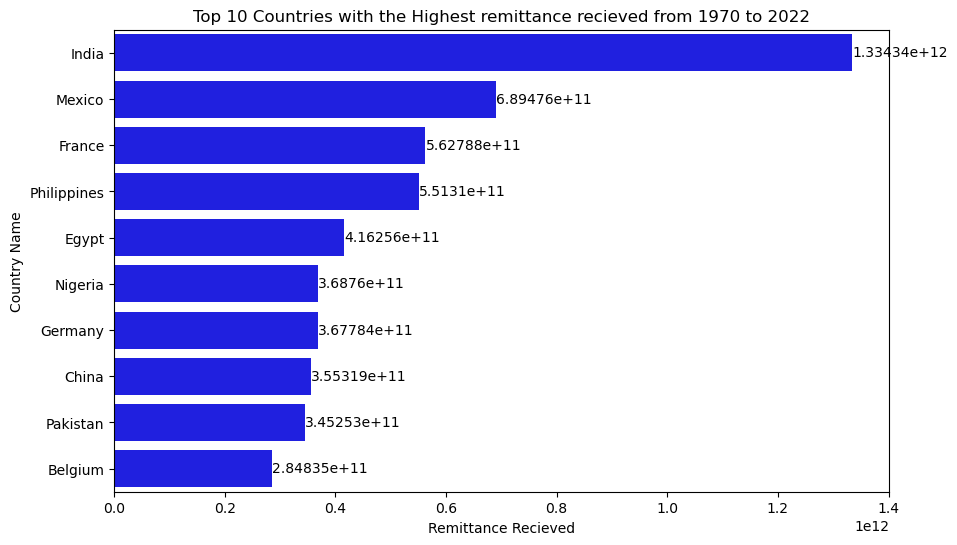

In [7]:
# creating a pandas dataframe with the Country name  and remittance_received coulmns
top10=pd.DataFrame(df.groupby('country_name')['remittance_received'].sum().sort_values(ascending = False)).reset_index()[:10]


plt.rcParams['figure.figsize'] = (10, 6)

ax = sns.barplot(y = top10.country_name, x = top10.remittance_received, data = top10, color='b')

for i in ax.containers:
    ax.bar_label(i)
    
plt.gca().set_title("Top 10 Countries with the Highest remittance recieved from 1970 to 2022")
plt.xlabel('Remittance Recieved')
plt.ylabel('Country Name')


plt.rc('font', size=15)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

plt.show();

The above chart shows that India is the highest remittance recieving countries from 1970 to 2022 with a total of 1,334,340,783,014.1Trillion and Average of 25,660,399,673.35 Billion each year. Followed  by Mexico and France with total of 689,475,707,229 Billion  and 562,788,349,446.9 Billion remittacne recieved 

### Top 10 Countries with the Highest remittance paid

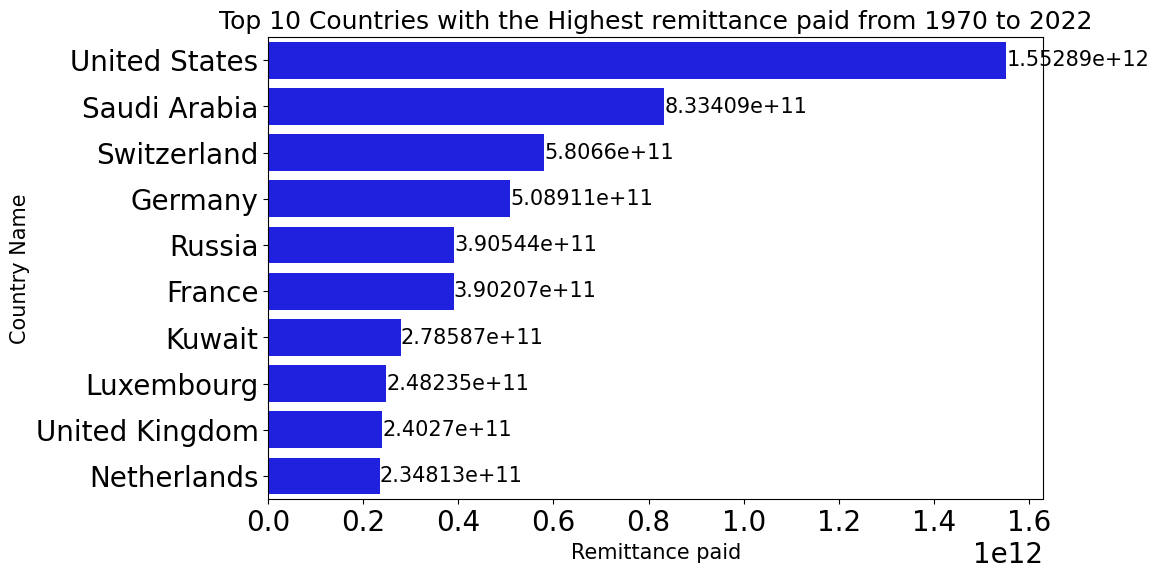

In [8]:
# creating a pandas dataframe with the Country name  and remittance_received coulmns
top10paid=pd.DataFrame(df.groupby('country_name')['remittance_paid'].sum().sort_values(ascending = False)).reset_index()[:10]


plt.rcParams['figure.figsize'] = (10, 6)

paid = sns.barplot(y = top10paid.country_name, x = top10paid.remittance_paid, data = top10, color='b')

for i in paid.containers:
    paid.bar_label(i)
    
plt.gca().set_title("Top 10 Countries with the Highest remittance paid from 1970 to 2022")
plt.xlabel('Remittance paid')
plt.ylabel('Country Name')


plt.rc('font', size=15)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

plt.show();

The above chart shows that United State is the highest remittance paid countries from 1970 to 2022 with a total of 1,552,888,100,000Trillion and Average of 29,863,232,692.3 Billion each year. Followed  by Saudi Arabia  and Switzerland  with total of 833,409,116,208.7 Billion  and 580,660,307,662 Billion remittacne paid 

### Remittance Trend from 1970 to 2022

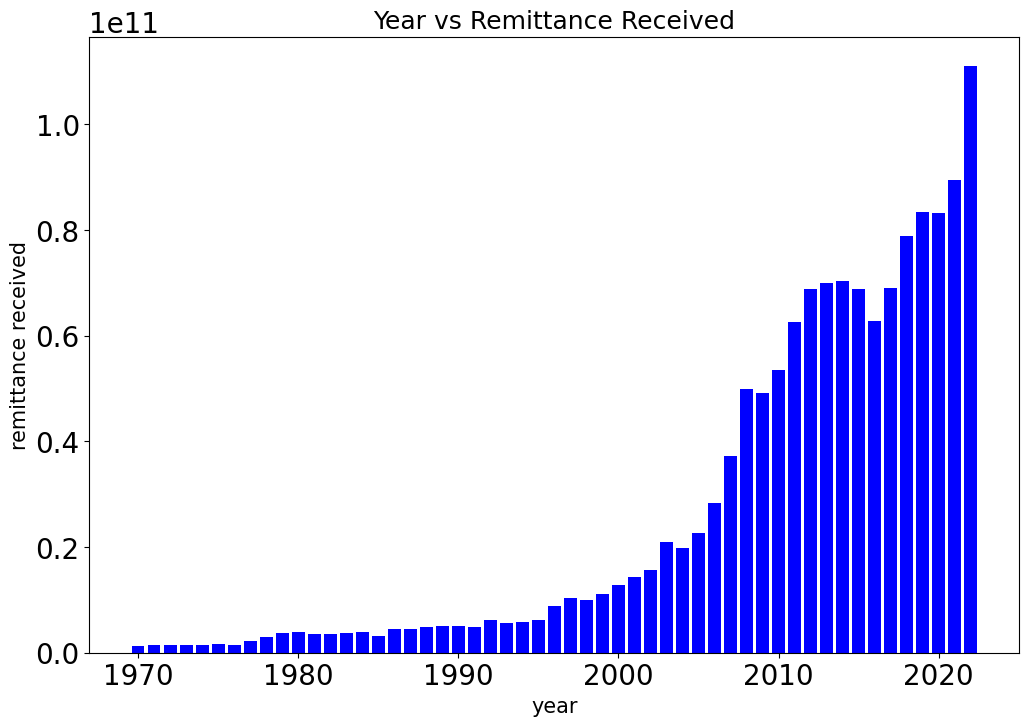

In [9]:
plt.figure(figsize=(12,8))
plt.bar(df['Year'],df['remittance_received'],color=['blue'])
plt.xlabel("year")
plt.ylabel("remittance received")
plt.title("Year vs Remittance Received")
plt.show()

- The Above charts shows that for the 192 countries 2022 had the highest remittance recieved we can also see that the trend of remiitance remmitace recieved was not stable as it increases and decreases overtime. There could be many factors affecting this. Which we will look out for in th hypothesis testing

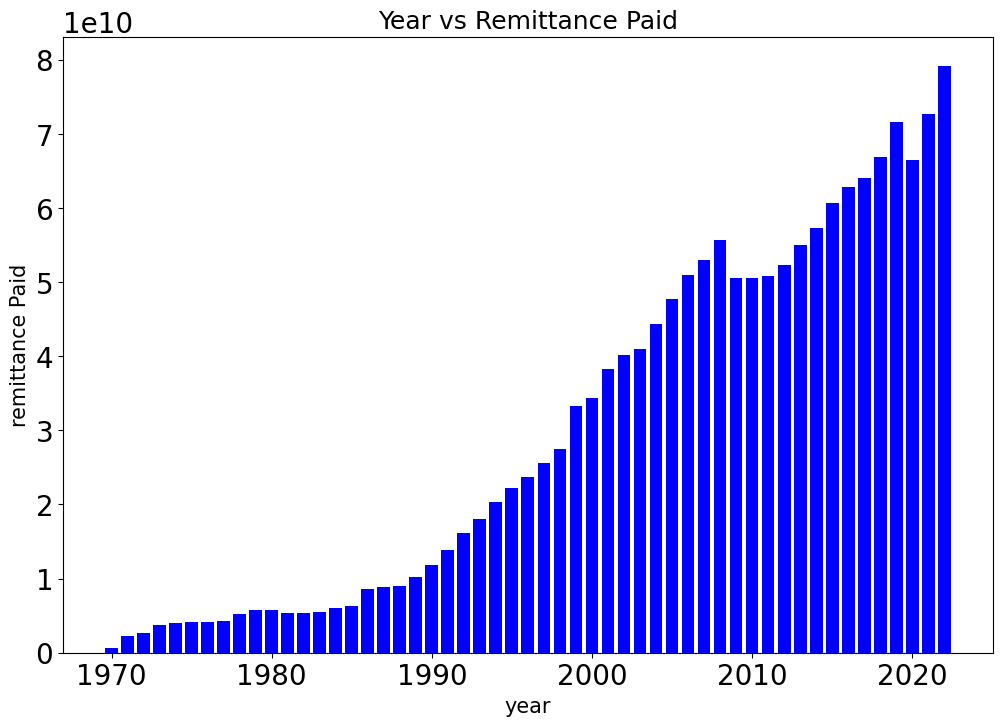

In [10]:
plt.figure(figsize=(12,8))
plt.bar(df['Year'],df['remittance_paid'],color=['blue'])
plt.xlabel("year")
plt.ylabel("remittance Paid")
plt.title("Year vs Remittance Paid")
plt.show()

- The Above charts shows that for the 192 countries 2022 had the highest remittance paid we can also see that the trend of remiitance remmitace paid not stable as it increases and decreases overtime

### Year VS Remittance Per Capita

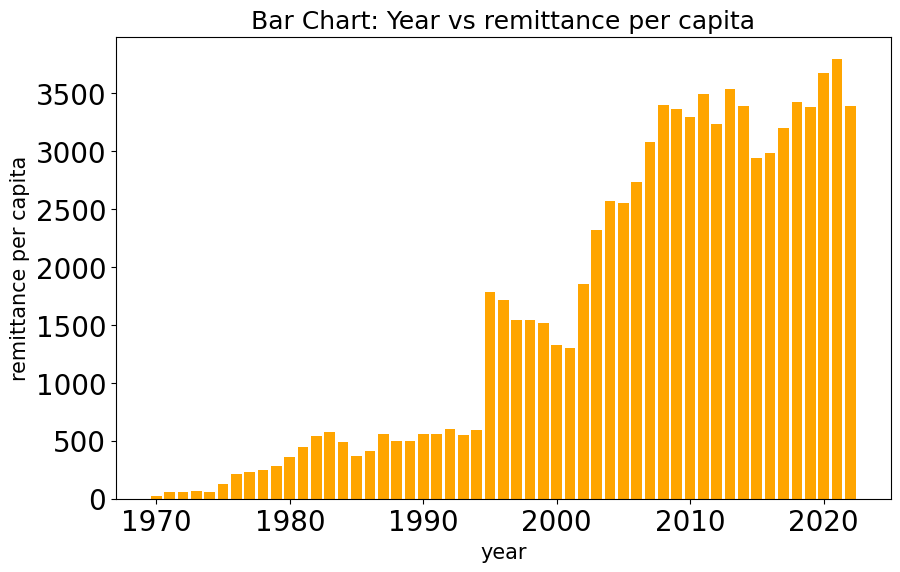

In [11]:
plt.figure(figsize=(10,6))
plt.bar(df['Year'],df['remittance_per_capita'],color=['orange'])
plt.xlabel("year")
plt.ylabel("remittance per capita")
plt.title("Bar Chart: Year vs remittance per capita")

plt.rc('font', size=10)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)

plt.show()

### Year VS Remittance to GDP ratio

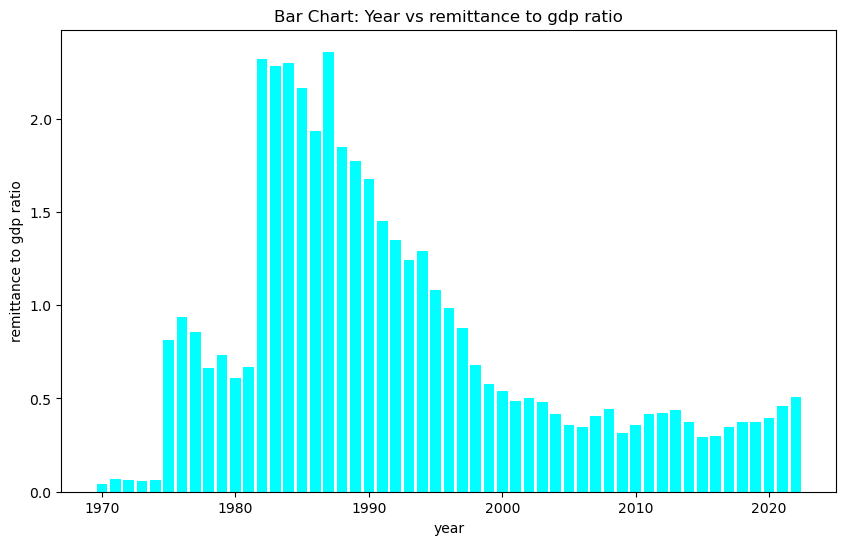

In [12]:
plt.figure(figsize=(10,6))
plt.bar(df['Year'],df['remittance_to_gdp_ratio'],color=['cyan'])
plt.xlabel("year")
plt.ylabel("remittance to gdp ratio")
plt.title("Bar Chart: Year vs remittance to gdp ratio")
plt.show()

From the above chart remittance to GDP ratio kept increasing each year but had a slight decrease in 2009  and 2020 

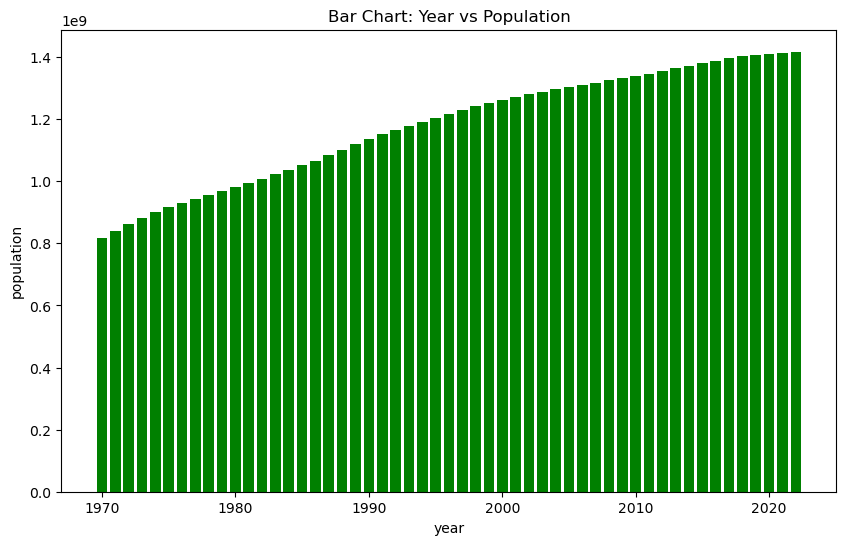

In [13]:
plt.figure(figsize=(10,6))
plt.bar(df['Year'],df['population'],color=['green'])
plt.xlabel("year")
plt.ylabel("population")
plt.title("Bar Chart: Year vs Population")
plt.show()

### GDP TREND 

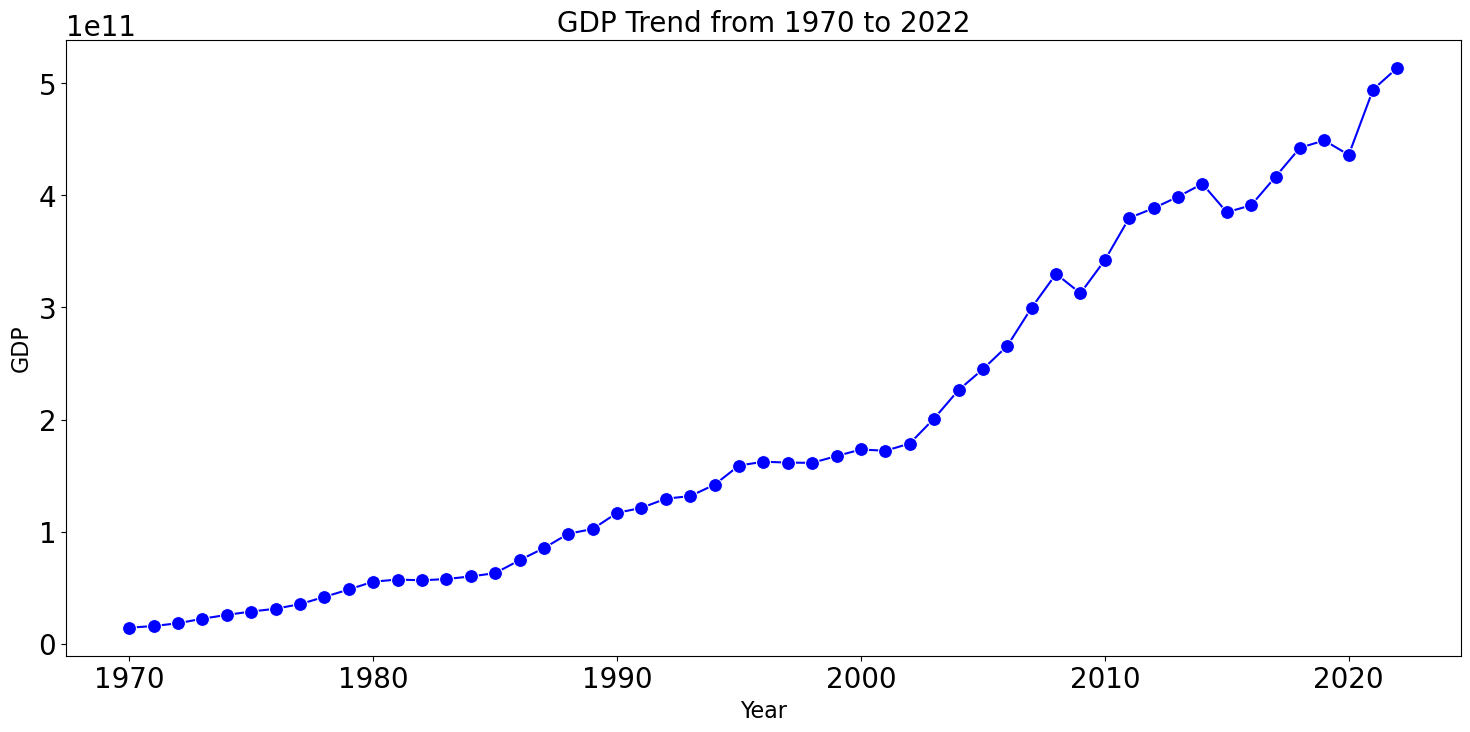

In [14]:
# visualizing the GDP trend over time with line plot
plt.figure(figsize=[18,8])

#set label sizes for axes, xtick and ytick
plt.rc('font', size=15)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

sns.lineplot(data=df, x="Year", y="gdp", marker='o', markersize=10, ci=None, color='b')
plt.title("GDP Trend from 1970 to 2022", fontsize=20)
plt.ylabel('GDP', fontsize = 16)
plt.xlabel('Year', fontsize=16);

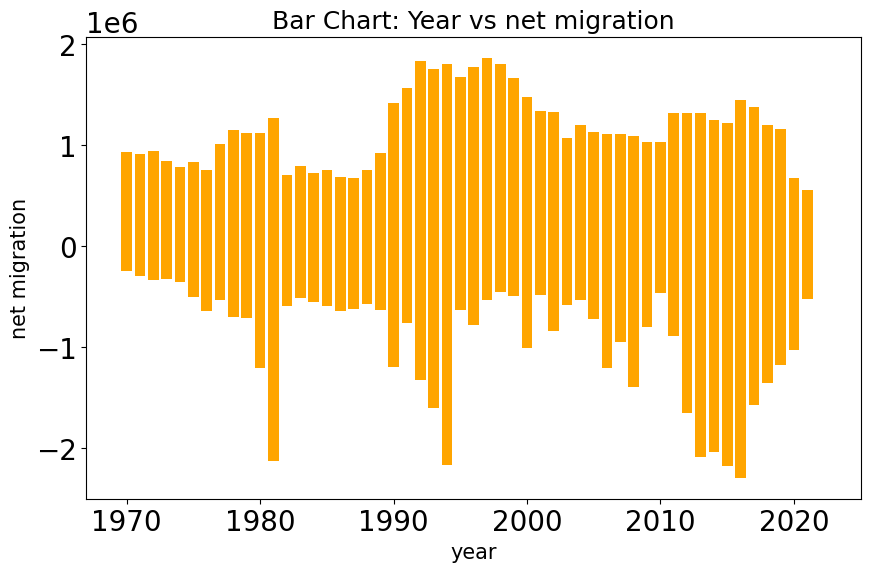

In [15]:
plt.figure(figsize=(10,6))
plt.bar(df['Year'],df['net_migration'],color=['orange'])
plt.xlabel("year")
plt.ylabel("net migration")
plt.title("Bar Chart: Year vs net migration")
plt.show()

### Count of Countries Income Group 

In [16]:
df['new_income_group'].unique()

array(['Low income', 'Upper middle income', 'Lower middle income',
       'High income'], dtype=object)

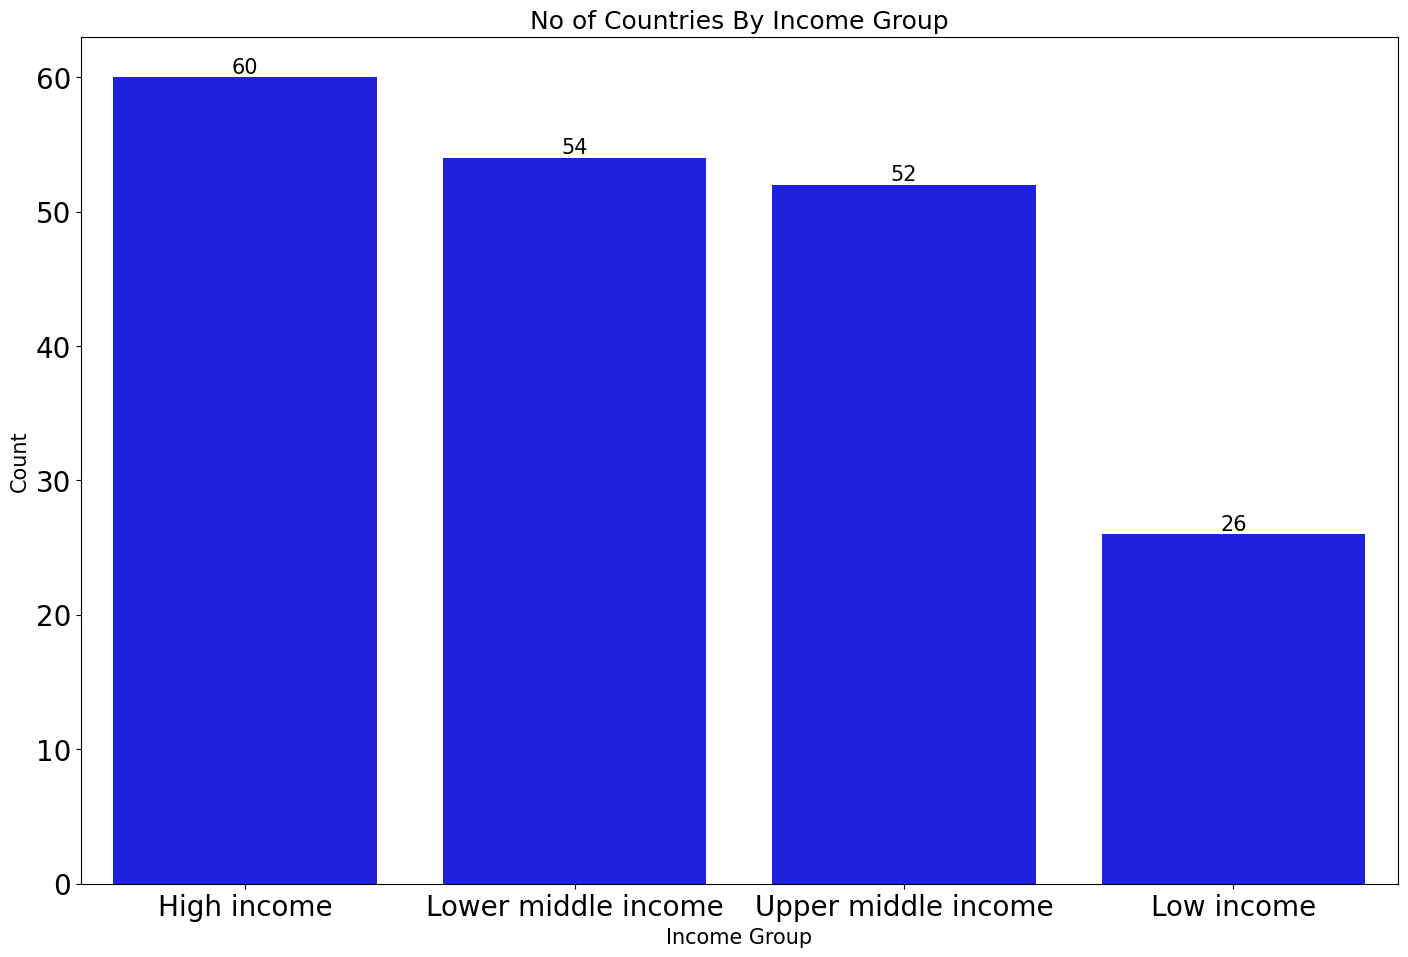

In [17]:
ing=pd.DataFrame(df.groupby('new_income_group')['country_name'].nunique().sort_values(ascending = False)).reset_index()[:]
ing

plt.rcParams['figure.figsize'] = (17, 11)

ig = paid = sns.barplot(y = ing.country_name, x = ing.new_income_group, data = top10, color='b')

for i in ig.containers:
    ig.bar_label(i)
    
plt.gca().set_title("No of Countries By Income Group")
plt.xlabel('Income Group')
plt.ylabel('Count')


plt.rc('font', size=15)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

plt.show();

The chart shows that there are more High income group countries followed closely by Lower Middle Income, upper Middle Income Group

### Count of Countries Region

In [18]:
df['new_region'].unique()

array(['South Asia', 'Europe & Central Asia',
       'Middle East & North Africa', 'Sub-Saharan Africa',
       'Latin America & Caribbean', 'East Asia & Pacific',
       'North America'], dtype=object)

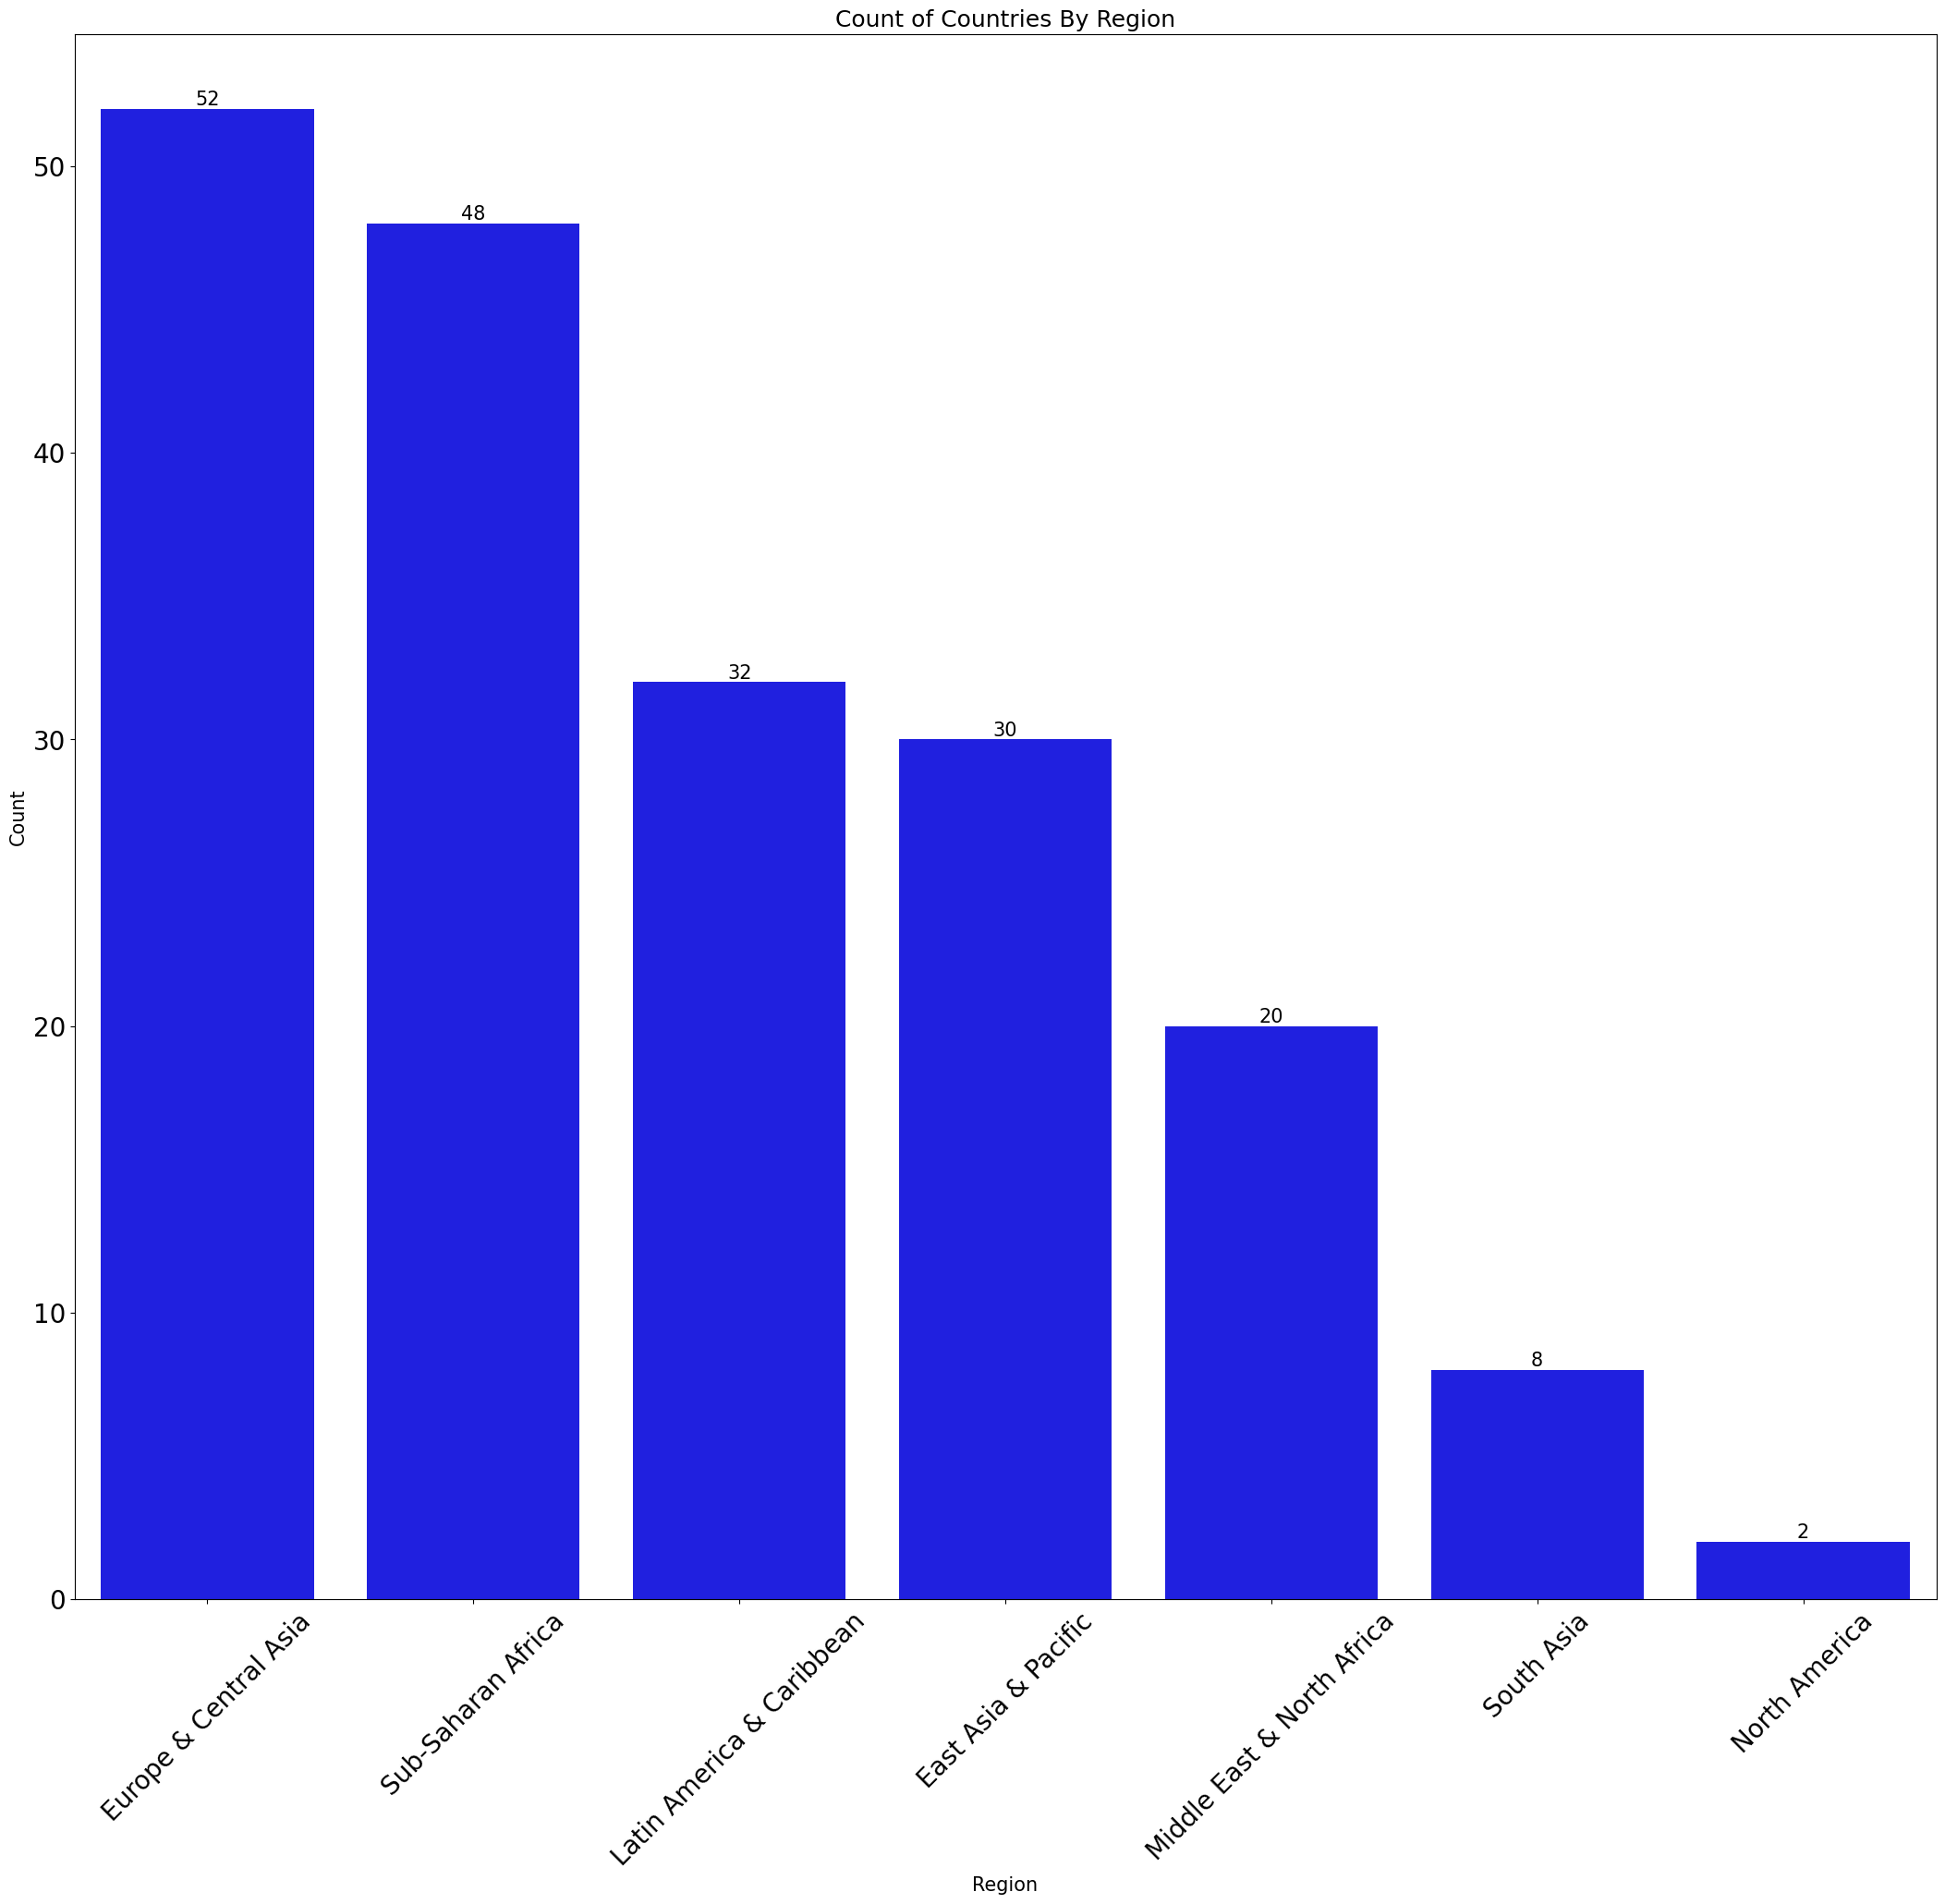

In [19]:
ing=pd.DataFrame(df.groupby('new_region')['country_name'].nunique().sort_values(ascending = False)).reset_index()[:]
ing

plt.rcParams['figure.figsize'] = (26, 22)

re = paid = sns.barplot(y = ing.country_name, x = ing.new_region, data = top10, color='b')

for i in re.containers:
    re.bar_label(i)
    
plt.gca().set_title("Count of Countries By Region")
plt.xlabel('Region')
plt.ylabel('Count')


plt.rc('font', size=15)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.xticks (rotation = 45)

plt.show();